In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import keras
from tensorflow.keras.utils import to_categorical
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.convolutional import Conv1D, MaxPooling1D
from tensorflow import keras                                                                                
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

Mounted at /content/drive


# ***Load the Dataset***

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/FinalDatasetWithlabelsP3T15.csv')

##finding the index and the max of consecutive 1's
arr = list(df['label'])
count = 0
prev = 0
indexend = 0
for i in range(0,len(arr)):
    if arr[i] == 1:
        count += 1
    else:            
      if count > prev:
        prev = count
        indexend = i
      count = 0

print("The longest sequence of 1's is "+str(prev))
print("index start at: "+ str(indexend-prev))
print("index ends at: "+ str(indexend-1))

The longest sequence of 1's is 152
index start at: 2534998
index ends at: 2535149


In [ ]:
##finding the index and the max of consecutive 0's
arr = list(df['label'])
count = 0
prev = 0
indexend = 0
for i in range(0,len(arr)):
    if arr[i] == 0:
        count += 1
    else:            
      if count > prev:
        prev = count
        indexend = i
      count = 0

print("The longest sequence of 0's is "+str(prev))
print("index start at: "+ str(indexend-prev))
print("index ends at: "+ str(indexend-1))

The longest sequence of 0's is 198
index start at: 2576265
index ends at: 2576462


# ***TRAIN DATASET***

In [ ]:
from scipy.signal import find_peaks
import numpy as np
from scipy import stats
from scipy.signal import find_peaks

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/FinalDatasetWithlabelsP3T15.csv')

df['label'] = df['label'].astype('category')
df['label'] = df['label'].cat.codes
df['subj_id'] = df['subj_id'].astype('category')
df['subj_id'] = df['subj_id'].cat.codes

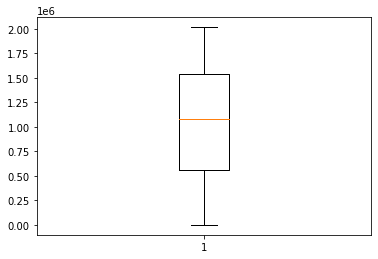

<Figure size 720x504 with 0 Axes>

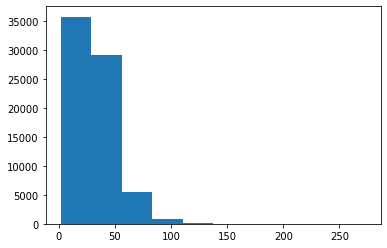

IQR, upper bound and lower bound values are :
40.0 106.0 -54.0


In [ ]:
df_train =  df[df.subj_id.isin( df.subj_id.unique()[:25] ) ]  #selecting 25 subjects for training

#find the peaks
x = df_train['magnitude'].values
peaks, _ = find_peaks(x, prominence=0.5)
peaks = np.insert(peaks, 0, 0, axis=0)

############################################################################################
def pairwiseDifference(arr, n):
  diff =[]
  for i in range(n - 1) :
    diff.append(abs(arr[i] - arr[i + 1]))
  return diff
        
arr = peaks
n = len(arr)
#calculationg window sizes.
windows = pairwiseDifference(arr, n)

#Using boxplot.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#boxplot.
plt.boxplot(arr)
fig = plt.figure(figsize =(10, 7))
plt.show()
#HISTOGRAM.
import matplotlib.pyplot as plt
plt.hist(windows)
plt.show()
###############################################################################################
#Finding the outliers 
# finding the 1st quartile 
q1 = np.quantile(windows, 0.25)
 
# finding the 3rd quartile
q3 = np.quantile(windows, 0.75)
med = np.median(windows)
 
# finding the iqr region
iqr = q3-q1
 
# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print("IQR, upper bound and lower bound values are :")
print(iqr, upper_bound, lower_bound)

###############################################################################################

#Removing and saving the list of dataframes for each stride.
list_of_df = []
windowsRemoved = []
for each in range(0, (len(peaks) - 1), 1  ):
  if 54 <= abs(peaks[each + 1]- peaks[each]) <= 106:
    list_of_df.append( df.loc[ peaks[each]:(peaks[each  + 1] - 1 ) ] )           
  else: 
    windowsRemoved.append((peaks[each + 1]- peaks[each]))
#################################################################################################
#zero imputing for each stride.
list_of_Zerodf = []
for each in range(0, len(list_of_df) ,1 ):
  i = np.arange(start= list_of_df[each].shape[0] + 1 , stop=111 )
  df_zero = pd.DataFrame(0, index=i, columns=list_of_df[each].columns)
  w1 = pd.concat([list_of_df[each],df_zero])  
  list_of_Zerodf.append(w1) 


#dataset after combining zero imputed df's.
FinalDataFrame = pd.concat(list_of_Zerodf)


# WINDOWING WITH NON OVERLAPPING WINDOWS with size 110
xs = []
ys = []
zs = []
train_labels = []
new_list = []
window_size = 110
step_size = 110

for i in range(0, FinalDataFrame.shape[0] - window_size, step_size):
  xs = FinalDataFrame['x'].values[i: i + 110]
  ys = FinalDataFrame['y'].values[i: i + 110]
  zs = FinalDataFrame['z'].values[i: i + 110]
  label = FinalDataFrame['label'].values[i: i + 110][0] 
  a = np.c_[ xs,ys,zs ]
  new_list.append(a)
  train_labels.append(label)

train_x = np.asarray(new_list)
train_y = np.asarray(train_labels)

KeyboardInterrupt: ignored

# ***TEST DATA***

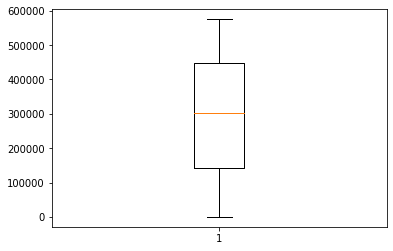

<Figure size 720x504 with 0 Axes>

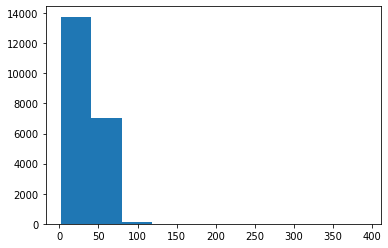

     Unnamed: 0  subj_id      loc_id  time_s  ...      y      z  magnitude  label
432         432       15  left_wrist    4.32  ... -0.961 -0.250   0.995450      0
433         433       15  left_wrist    4.33  ... -0.914 -0.238   0.948757      0
434         434       15  left_wrist    4.34  ... -0.875 -0.207   0.906225      0
435         435       15  left_wrist    4.35  ... -0.848 -0.184   0.881644      0
436         436       15  left_wrist    4.36  ... -0.844 -0.168   0.881499      0
..          ...      ...         ...     ...  ...    ...    ...        ...    ...
106           0        0           0    0.00  ...  0.000  0.000   0.000000      0
107           0        0           0    0.00  ...  0.000  0.000   0.000000      0
108           0        0           0    0.00  ...  0.000  0.000   0.000000      0
109           0        0           0    0.00  ...  0.000  0.000   0.000000      0
110           0        0           0    0.00  ...  0.000  0.000   0.000000      0

[110 rows x 9 c

In [ ]:
df_test = df[df.subj_id.isin( df.subj_id.unique()[25:] )]

#find the peaks
x = df_test['magnitude'].values
peaks, _ = find_peaks(x, prominence=0.5)
# peaks = np.insert(peaks, 0, 0, axis=0)
############################################################################################
def pairwiseDifference(arr, n):
  diff =[]
  for i in range(n - 1) :
    diff.append(abs(arr[i] - arr[i + 1]))
  return diff
        
arr = peaks
n = len(arr)
#calculationg window sizes.
windows = pairwiseDifference(arr, n)

#Using boxplot.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#boxplot.
plt.boxplot(arr)
fig = plt.figure(figsize =(10, 7))
plt.show()
#HISTOGRAM.
import matplotlib.pyplot as plt
plt.hist(windows)
plt.show()

###############################################################################################
#Finding the ouliers 
# finding the 1st quartile
q1 = np.quantile(windows, 0.25)
 
# finding the 3rd quartile
q3 = np.quantile(windows, 0.75)
med = np.median(windows)
 
# finding the iqr region
iqr = q3-q1
 
# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print("IQR, upper bound and lower bound values are :")
print(iqr, upper_bound, lower_bound)

###############################################################################################

#Removing and saving the list of dataframes for each stride.
list_of_df = []
windowsRemoved = []
for each in range(0, (len(peaks) - 1), 1  ):
  if 54 <= abs(peaks[each + 1]- peaks[each]) <= 106:
    list_of_df.append( df.loc[ peaks[each]:(peaks[each  + 1] - 1 ) ] )           
  else: 
    windowsRemoved.append((peaks[each + 1]- peaks[each]))
################################################################################################
#zero imputing for each stride.
list_of_Zerodf = []
for each in range(0, len(list_of_df) ,1 ):
  i = np.arange(start= list_of_df[each].shape[0] + 1 , stop=111 )
  df_zero = pd.DataFrame(0, index=i, columns=list_of_df[each].columns)
  w1 = pd.concat([list_of_df[each],df_zero])  
  list_of_Zerodf.append(w1) 

print(list_of_Zerodf[4])

#dataset after combining zero imputed df's.
FinalDataFrame = pd.concat(list_of_Zerodf)

xs = []
ys = []
zs = []
test_labels = []
new_list = []
window_size = 110
step_size = 110

for i in range(0, FinalDataFrame.shape[0] - window_size, step_size):
  xs = FinalDataFrame['x'].values[i: i + 110]
  ys = FinalDataFrame['y'].values[i: i + 110]
  zs = FinalDataFrame['z'].values[i: i + 110]

  label = FinalDataFrame['label'].values[i: i + 110][0] 
  a = np.c_[ xs,ys,zs ]
  new_list.append(a)
  test_labels.append(label)

test_x = np.asarray(new_list)
test_y = np.asarray(test_labels)

# ***CNN***

In [ ]:
model_cnn = Sequential() 

model_cnn.add(Conv1D(filters=160, kernel_size=2, activation='relu', input_shape=(110,3)))

model_cnn.add(MaxPooling1D(pool_size=1))
model_cnn.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model_cnn.add(MaxPooling1D(pool_size=1))
model_cnn.add(Conv1D(filters=96, kernel_size=2, activation='relu'))
model_cnn.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model_cnn.add(MaxPooling1D(pool_size=1))
model_cnn.add(Flatten()) 
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(64, activation='sigmoid'))
model_cnn.add(Dense(1,activation='sigmoid'))

model_cnn.compile(loss='binary_crossentropy', optimizer="adam", metrics = ["accuracy", tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 109, 160)          1120      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 109, 160)         0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 108, 128)          41088     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 108, 128)         0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 107, 96)           24672     
                                                                 
 conv1d_3 (Conv1D)           (None, 106, 64)           1

In [ ]:
model_cnn.fit(train_x, train_y, epochs=100, batch_size=1000, verbose=1)

Epoch 1/100
10/10 [==============================] - 3s 60ms/step - loss: 0.6973 - accuracy: 0.5004 - recall: 0.6225 - precision: 0.5070
Epoch 2/100
10/10 [==============================] - 0s 28ms/step - loss: 0.6928 - accuracy: 0.5156 - recall: 0.7865 - precision: 0.5154
Epoch 3/100
10/10 [==============================] - 0s 27ms/step - loss: 0.6922 - accuracy: 0.5133 - recall: 0.9076 - precision: 0.5120
Epoch 4/100
10/10 [==============================] - 0s 27ms/step - loss: 0.6917 - accuracy: 0.5204 - recall: 0.8210 - precision: 0.5179
Epoch 5/100
10/10 [==============================] - 0s 27ms/step - loss: 0.6902 - accuracy: 0.5238 - recall: 0.8055 - precision: 0.5204
Epoch 6/100
10/10 [==============================] - 0s 28ms/step - loss: 0.6911 - accuracy: 0.5233 - recall: 0.5713 - precision: 0.5288
Epoch 7/100
10/10 [==============================] - 0s 27ms/step - loss: 0.6912 - accuracy: 0.5153 - recall: 0.3176 - precision: 0.5396
Epoch 8/100
10/10 [======================

# ***EVALUATION***

In [ ]:
scores = model_cnn.evaluate(test_x,test_y, verbose=1)

87/87 [==============================] - 1s 4ms/step - loss: 0.7503 - accuracy: 0.5050 - recall: 0.4345 - precision: 0.5122


In [ ]:
pred = model_cnn.predict(test_x) 
pred = np.argmax(pred, axis = 1)
label = test_y

x = pd.DataFrame(pred,columns= ["preds"])

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, pred)

array([[1374,    0],
       [1404,    0]])

In [ ]:
from sklearn import metrics 
from sklearn.metrics import classification_report
print("\n -------------Classification Report-------------\n")
print(classification_report(test_y, pred))


 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       0.49      1.00      0.66      1374
           1       0.00      0.00      0.00      1404

    accuracy                           0.49      2778
   macro avg       0.25      0.50      0.33      2778
weighted avg       0.24      0.49      0.33      2778



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# ***EXP2***

In [ ]:
model_cnn1 = Sequential() 

model_cnn1.add(Conv1D(filters=160, kernel_size=2, activation='relu', input_shape=(110,3)))

model_cnn1.add(MaxPooling1D(pool_size=1))
model_cnn1.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model_cnn1.add(MaxPooling1D(pool_size=1))
# model_cnn1.add(Conv1D(filters=96, kernel_size=2, activation='relu'))
# model_cnn1.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model_cnn1.add(MaxPooling1D(pool_size=1))
model_cnn1.add(Flatten())
model_cnn1.add(Dropout(0.5))
# model_cnn1.add(Dense(64, activation='sigmoid'))
model_cnn1.add(Dense(1,activation='sigmoid'))

model_cnn1.compile(loss='binary_crossentropy', optimizer="adam", metrics = ["accuracy", tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])
model_cnn1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 109, 160)          1120      
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 109, 160)         0         
 1D)                                                             
                                                                 
 conv1d_7 (Conv1D)           (None, 108, 128)          41088     
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 108, 128)         0         
 1D)                                                             
                                                                 
 max_pooling1d_8 (MaxPooling  (None, 108, 128)         0         
 1D)                                                             
                                                      

In [ ]:
model_cnn1.fit(train_x, train_y, epochs=100, batch_size=1000, verbose=1)

Epoch 1/100
10/10 [==============================] - 1s 21ms/step - loss: 0.6963 - accuracy: 0.5040 - recall_2: 0.6419 - precision_2: 0.5097
Epoch 2/100
10/10 [==============================] - 0s 21ms/step - loss: 0.6938 - accuracy: 0.5130 - recall_2: 0.6201 - precision_2: 0.5175
Epoch 3/100
10/10 [==============================] - 0s 22ms/step - loss: 0.6930 - accuracy: 0.5038 - recall_2: 0.5149 - precision_2: 0.5119
Epoch 4/100
10/10 [==============================] - 0s 21ms/step - loss: 0.6906 - accuracy: 0.5185 - recall_2: 0.6214 - precision_2: 0.5222
Epoch 5/100
10/10 [==============================] - 0s 21ms/step - loss: 0.6894 - accuracy: 0.5314 - recall_2: 0.7199 - precision_2: 0.5287
Epoch 6/100
10/10 [==============================] - 0s 21ms/step - loss: 0.6894 - accuracy: 0.5313 - recall_2: 0.5763 - precision_2: 0.5363
Epoch 7/100
10/10 [==============================] - 0s 21ms/step - loss: 0.6888 - accuracy: 0.5271 - recall_2: 0.7025 - precision_2: 0.5261
Epoch 8/100
1

In [ ]:
scores = model_cnn.evaluate(test_x,test_y, verbose=1)
scores

87/87 [==============================] - 0s 3ms/step - loss: 0.7503 - accuracy: 0.5050 - recall: 0.4345 - precision: 0.5122


[0.7503039240837097, 0.5050395727157593, 0.4344729483127594, 0.512174665927887]

In [ ]:
pred = model_cnn.predict(test_x) 
pred = np.argmax(pred, axis = 1)
label = test_y

x = pd.DataFrame(pred,columns= ["preds"])

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, pred)

array([[1374,    0],
       [1404,    0]])

In [ ]:
from sklearn import metrics 
from sklearn.metrics import classification_report
print("\n -------------Classification Report-------------\n")
print(classification_report(test_y, pred))


 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       0.49      1.00      0.66      1374
           1       0.00      0.00      0.00      1404

    accuracy                           0.49      2778
   macro avg       0.25      0.50      0.33      2778
weighted avg       0.24      0.49      0.33      2778



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## ***EXP 3***

In [ ]:
from keras import regularizers

In [ ]:
model_cnn2 = Sequential() 

model_cnn2.add(Conv1D(filters=160, kernel_size=2, activation='relu', input_shape=(110,3),kernel_regularizer=regularizers.l2(0.01)))

model_cnn2.add(Conv1D(filters=128, kernel_size=2, activation='relu'))

model_cnn2.add(Flatten())
model_cnn2.add(Dropout(0.7))

model_cnn2.add(Dense(1,activation='sigmoid'))

model_cnn2.compile(loss='binary_crossentropy', optimizer="adam", metrics = ["accuracy", tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])
model_cnn2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 109, 160)          1120      
                                                                 
 conv1d_9 (Conv1D)           (None, 108, 128)          41088     
                                                                 
 flatten_3 (Flatten)         (None, 13824)             0         
                                                                 
 dropout_3 (Dropout)         (None, 13824)             0         
                                                                 
 dense_4 (Dense)             (None, 1)                 13825     
                                                                 
Total params: 56,033
Trainable params: 56,033
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_cnn2.fit(train_x, train_y, epochs=50, batch_size=1000, verbose=1)

Epoch 1/50
10/10 [==============================] - 1s 16ms/step - loss: 0.7513 - accuracy: 0.4996 - recall_3: 0.6214 - precision_3: 0.5064
Epoch 2/50
10/10 [==============================] - 0s 15ms/step - loss: 0.7392 - accuracy: 0.5084 - recall_3: 0.4265 - precision_3: 0.5201
Epoch 3/50
10/10 [==============================] - 0s 15ms/step - loss: 0.7306 - accuracy: 0.5154 - recall_3: 0.7519 - precision_3: 0.5161
Epoch 4/50
10/10 [==============================] - 0s 15ms/step - loss: 0.7236 - accuracy: 0.5161 - recall_3: 0.6441 - precision_3: 0.5194
Epoch 5/50
10/10 [==============================] - 0s 15ms/step - loss: 0.7169 - accuracy: 0.5235 - recall_3: 0.6983 - precision_3: 0.5235
Epoch 6/50
10/10 [==============================] - 0s 15ms/step - loss: 0.7127 - accuracy: 0.5252 - recall_3: 0.4372 - precision_3: 0.5408
Epoch 7/50
10/10 [==============================] - 0s 15ms/step - loss: 0.7093 - accuracy: 0.5204 - recall_3: 0.7894 - precision_3: 0.5186
Epoch 8/50
10/10 [==

In [ ]:
scores = model_cnn2.evaluate(test_x,test_y, verbose=1)
scores

87/87 [==============================] - 1s 3ms/step - loss: 0.7134 - accuracy: 0.5047 - recall_3: 0.3903 - precision_3: 0.5131


[0.7134271264076233,
 0.5046796202659607,
 0.39031338691711426,
 0.5131086111068726]

In [ ]:
pred = model_cnn.predict(test_x) 
pred = np.argmax(pred, axis = 1)
label = test_y

x = pd.DataFrame(pred,columns= ["preds"])

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, pred)

array([[1374,    0],
       [1404,    0]])

In [ ]:
from sklearn import metrics 
from sklearn.metrics import classification_report
print("\n -------------Classification Report-------------\n")
print(classification_report(test_y, pred))


 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       0.49      1.00      0.66      1374
           1       0.00      0.00      0.00      1404

    accuracy                           0.49      2778
   macro avg       0.25      0.50      0.33      2778
weighted avg       0.24      0.49      0.33      2778



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# ***EXP4***

In [ ]:
from keras.regularizers import l2

model_cnn3 = Sequential() 

model_cnn3.add(Conv1D(filters=160, kernel_size=2, activation='relu', input_shape=(110,3), kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))

model_cnn3.add(Conv1D(filters=128, kernel_size=2, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))

model_cnn3.add(Flatten())
model_cnn3.add(Dropout(0.7))

model_cnn3.add(Dense(1,activation='sigmoid'))

model_cnn3.compile(loss='binary_crossentropy', optimizer="adam", metrics = ["accuracy", tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])
model_cnn3.summary()

#_________
model_cnn3.fit(train_x, train_y, epochs=50, batch_size=1000, verbose=1)
#________
scores = model_cnn3.evaluate(test_x,test_y, verbose=1)
scores

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_10 (Conv1D)          (None, 109, 160)          1120      
                                                                 
 conv1d_11 (Conv1D)          (None, 108, 128)          41088     
                                                                 
 flatten_4 (Flatten)         (None, 13824)             0         
                                                                 
 dropout_4 (Dropout)         (None, 13824)             0         
                                                                 
 dense_5 (Dense)             (None, 1)                 13825     
                                                                 
Total params: 56,033
Trainable params: 56,033
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
10/10 [==============================] 

[0.6932255029678345, 0.5053995847702026, 1.0, 0.5053995847702026]

# ***EXP5***

In [ ]:
from keras.regularizers import l2

from keras.callbacks import ReduceLROnPlateau

rlrop = ReduceLROnPlateau(monitor='loss', factor=0.1, patience=100)

model_cnn4 = Sequential() 
model_cnn4.add(Conv1D(filters=160, kernel_size=2, activation='relu', input_shape=(110,3), kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model_cnn4.add(Conv1D(filters=128, kernel_size=2, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model_cnn4.add(Flatten())
model_cnn4.add(Dropout(0.7))
model_cnn4.add(Dense(1,activation='sigmoid'))


model_cnn4.compile(loss='binary_crossentropy', optimizer="adam", metrics = ["accuracy", tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])
model_cnn4.summary()

#_________
model_cnn4.fit(train_x, train_y, epochs=50, batch_size=1000, verbose=1,callbacks=[rlrop])
#________
scores = model_cnn4.evaluate(test_x,test_y, verbose=1)
scores

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_12 (Conv1D)          (None, 109, 160)          1120      
                                                                 
 conv1d_13 (Conv1D)          (None, 108, 128)          41088     
                                                                 
 flatten_5 (Flatten)         (None, 13824)             0         
                                                                 
 dropout_5 (Dropout)         (None, 13824)             0         
                                                                 
 dense_6 (Dense)             (None, 1)                 13825     
                                                                 
Total params: 56,033
Trainable params: 56,033
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
10/10 [==============================] 

[0.6931127309799194, 0.5053995847702026, 1.0, 0.5053995847702026]

## ***EXP7***

In [ ]:
from keras.regularizers import l2
# import noise layer
from keras.layers import GaussianNoise
# define noise layer
layer = GaussianNoise(0.1)




model_cnn6 = Sequential() 
model_cnn6.add(Conv1D(filters=160, kernel_size=2, activation='relu', input_shape=(110,3) , kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model_cnn6.add(GaussianNoise(0.1))
model_cnn6.add(Conv1D(filters=128, kernel_size=2, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model_cnn6.add(GaussianNoise(0.1))
model_cnn6.add(Flatten())
model_cnn6.add(Dropout(0.7))
model_cnn6.add(GaussianNoise(0.1))
model_cnn6.add(Dense(1,activation='sigmoid'))



model_cnn6.compile(loss='binary_crossentropy', optimizer="adam", metrics = ["accuracy", tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])
model_cnn6.summary()

#_________
model_cnn6.fit(train_x, train_y, epochs=50, batch_size=1000, verbose=1, validation_split=0.2)
#________
scores = model_cnn6.evaluate(test_x,test_y, verbose=1)
scores

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_14 (Conv1D)          (None, 109, 160)          1120      
                                                                 
 gaussian_noise_1 (GaussianN  (None, 109, 160)         0         
 oise)                                                           
                                                                 
 conv1d_15 (Conv1D)          (None, 108, 128)          41088     
                                                                 
 gaussian_noise_2 (GaussianN  (None, 108, 128)         0         
 oise)                                                           
                                                                 
 flatten_6 (Flatten)         (None, 13824)             0         
                                                                 
 dropout_6 (Dropout)         (None, 13824)            

[0.6940514445304871, 0.5053995847702026, 1.0, 0.5053995847702026]

***EXP 8***

In [ ]:
from keras.regularizers import l2

from keras.callbacks import ReduceLROnPlateau

rlrop = ReduceLROnPlateau(monitor='accuracy', factor=0.1, patience=100)

model_cnn4 = Sequential() 
model_cnn4.add(Conv1D(filters=160, kernel_size=2, activation='relu', input_shape=(110,3), kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model_cnn4.add(Conv1D(filters=128, kernel_size=2, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model_cnn4.add(Flatten())
model_cnn4.add(Dropout(0.7))
model_cnn4.add(Dense(1,activation='sigmoid'))


model_cnn4.compile(loss='binary_crossentropy', optimizer="adam", metrics = ["accuracy", tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])
model_cnn4.summary()

#_________
model_cnn4.fit(train_x, train_y, epochs=50, batch_size=1000, verbose=1,callbacks=[rlrop])
#________
scores = model_cnn4.evaluate(test_x,test_y, verbose=1)
scores

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_16 (Conv1D)          (None, 109, 160)          1120      
                                                                 
 conv1d_17 (Conv1D)          (None, 108, 128)          41088     
                                                                 
 flatten_7 (Flatten)         (None, 13824)             0         
                                                                 
 dropout_7 (Dropout)         (None, 13824)             0         
                                                                 
 dense_8 (Dense)             (None, 1)                 13825     
                                                                 
Total params: 56,033
Trainable params: 56,033
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
10/10 [==============================] 

[0.693123996257782, 0.5053995847702026, 1.0, 0.5053995847702026]

In [ ]:
df.var(axis=1)

0          2.851896e+01
1          2.810360e+01
2          2.793930e+01
3          2.801802e+01
4          2.835883e+01
               ...     
2590443    8.387772e+11
2590444    8.387778e+11
2590445    8.387785e+11
2590446    8.387791e+11
2590447    8.387797e+11
Length: 2590448, dtype: float64